## Stock Return Regression  - Thanay Murthy
  
Load info.txt and performance.csv into Python or R. The file performance.csv has columns ID, Date,
and Performance, which are monthly returns for each instrument identified by ID and each Date since
January 1, 1990. The file info.txt has static information about each instrument identified by ID, including
Name, Currency, and (Geographic) Focus.  
  
##### 1. Join input files performance.csv and info.txt, and produce a data frame with Date, Index1, Index2, Index3 and Stock A. The values are monthly returns.  

In [74]:
import pandas as pd

performance_df = pd.read_csv("/Users/thanay/Documents/Academic/Projects/StepStoneGroupAssessment/StockReturnRegression/data/performance 2023.csv")
info_df = pd.read_table("/Users/thanay/Documents/Academic/Projects/StepStoneGroupAssessment/StockReturnRegression/data/info 2023.txt", delimiter=" ")

In [75]:
info_df.head(5)

,ID,Name,Currency,Focus
0,1,Index 1,USD,United States
1,2,Index 2,USD,United States
2,3,Index 3,USD,Europe
3,4,Stock A,USD,United States


In [76]:
performance_df.head(5)

,ID,Date,Performance
0,1,01/01/1990,-0.068817
1,2,01/01/1990,-0.011883
2,3,01/01/1990,-0.019140
3,4,01/01/1990,-0.091892
4,1,02/01/1990,0.008539


In [77]:
merged_df = performance_df.merge(info_df, on="ID")
merged_df.head(10)

,ID,Date,Performance,Name,Currency,Focus
0,1,01/01/1990,-0.068817,Index 1,USD,United States
1,2,01/01/1990,-0.011883,Index 2,USD,United States
2,3,01/01/1990,-0.019140,Index 3,USD,Europe
3,4,01/01/1990,-0.091892,Stock A,USD,United States
4,1,02/01/1990,0.008539,Index 1,USD,United States
5,2,02/01/1990,0.003236,Index 2,USD,United States
6,3,02/01/1990,-0.023944,Index 3,USD,Europe
7,4,02/01/1990,0.059524,Stock A,USD,United States
8,1,03/01/1990,0.024255,Index 1,USD,United States
9,2,03/01/1990,0.000737,Index 2,USD,United States


In [78]:
monthly_returns_df = merged_df.pivot(index="Date", columns="Name", values="Performance").reset_index()

monthly_returns_df.head(10)

Name,Date,Index 1,Index 2,Index 3,Stock A
0,01/01/1990,-0.068817,-0.011883,-0.019140,-0.091892
1,01/01/1991,0.041518,0.012362,0.010910,0.229506
2,01/01/1992,-0.019900,-0.013604,0.049300,0.083338
3,01/01/1993,0.007046,0.019176,-0.000886,0.046225
4,01/01/1994,0.032501,0.013502,0.046439,0.035714
5,01/01/1995,0.024278,0.019790,-0.025108,0.033241
6,01/01/1996,0.032617,0.006641,0.038182,0.003591
7,01/01/1997,0.061317,0.003062,0.064970,0.106140
8,01/01/1998,0.010150,0.012838,0.056618,-0.015418
9,01/01/1999,0.041009,0.007137,0.032629,0.112266


In [79]:
monthly_returns_df = monthly_returns_df[["Date", "Index 1", "Index 2", "Index 3", "Stock A"]]
monthly_returns_df.head(10)

Name,Date,Index 1,Index 2,Index 3,Stock A
0,01/01/1990,-0.068817,-0.011883,-0.019140,-0.091892
1,01/01/1991,0.041518,0.012362,0.010910,0.229506
2,01/01/1992,-0.019900,-0.013604,0.049300,0.083338
3,01/01/1993,0.007046,0.019176,-0.000886,0.046225
4,01/01/1994,0.032501,0.013502,0.046439,0.035714
5,01/01/1995,0.024278,0.019790,-0.025108,0.033241
6,01/01/1996,0.032617,0.006641,0.038182,0.003591
7,01/01/1997,0.061317,0.003062,0.064970,0.106140
8,01/01/1998,0.010150,0.012838,0.056618,-0.015418
9,01/01/1999,0.041009,0.007137,0.032629,0.112266


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

monthly_returns_df["Date"] = pd.to_datetime(monthly_returns_df["Date"])
monthly_returns_df.head(5)

Name,Date,Index 1,Index 2,Index 3,Stock A
0,1990-01-01,-0.068817,-0.011883,-0.019140,-0.091892
1,1991-01-01,0.041518,0.012362,0.010910,0.229506
2,1992-01-01,-0.019900,-0.013604,0.049300,0.083338
3,1993-01-01,0.007046,0.019176,-0.000886,0.046225
4,1994-01-01,0.032501,0.013502,0.046439,0.035714


In [81]:
monthly_returns_df = monthly_returns_df.sort_values("Date")
monthly_returns_df.head(5)

Name,Date,Index 1,Index 2,Index 3,Stock A
0,1990-01-01,-0.068817,-0.011883,-0.019140,-0.091892
33,1990-02-01,0.008539,0.003236,-0.023944,0.059524
66,1990-03-01,0.024255,0.000737,0.016805,-0.129213
99,1990-04-01,-0.026887,-0.009162,-0.033530,-0.019355
132,1990-05-01,0.091989,0.029608,0.074398,0.019737


#### 2. Split the dataset into training and testing per 80/20 split. Use the training dataset, regress the Stock A returns against all 3 indices together, and interpret the results. Please set seed to make reproducible outputs.  

In [82]:
train_data, test_data = train_test_split(monthly_returns_df, test_size=0.2, random_state=63, shuffle=False)

X_train = train_data[['Index 1', 'Index 2', 'Index 3']]
y_train = train_data['Stock A']

In [83]:
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Stock A   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     49.60
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           3.28e-26
Time:                        22:40:35   Log-Likelihood:                 303.59
No. Observations:                 314   AIC:                            -599.2
Df Residuals:                     310   BIC:                            -584.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0028      0.006     -0.479      0.6

The regression results indicate that Index 1 is a strong and significant predictor of Stock A returns, while Index 2 and Index 3 do not contribute significantly. The model explains approximately 32% of the variance in Stock A returns, but moderate multicollinearity and potential non-normality of residuals should be addressed for improved reliability. Further refinement, such as removing insignificant predictors or regularization, may enhance the model’s performance.

#### 3. What might be the potential problems with this regression, and how to identify the problems?  

Other potential problems of the linear regression might come out of multicollinearity of predictors, including unstable estimates that balloon coefficients. Such models overfit in most situations, yielding high fits to the training dataset while becoming poorly generalizable to new, unseen data. These can be diagnosed by the following: Variance Inflation Factor (VIF) is a way to quantify multicollinearity, where high VIF suggests correlated predictors; residual plots may indicate non-linearity or heteroscedasticity; cross-validation may help in assessing overfitting by comparing training and testing performance. To solve these problems, one may want to use regularization or feature selection.

#### 4. Use Lasso model to re-run the regression. Interpret the new coefficients, and explain why it’s different from the results from linear regression.  

Unlike linear regression, Lasso regression introduces regularization, which penalizes large coefficients and shrinks some to exactly zero, hence doing feature selection. This, in turn, helps Lasso to handle multicollinearity by selecting only one predictor from highly correlated variables, while linear regression may assign unstable or inflated coefficients to all predictors. The resulting coefficients in Lasso underline only the most significant predictors of explaining Stock A returns, hence reducing overfitting and improving generalization. Linear regression, lacking this regularization, includes all features regardless of their relevance, leading to potential redundancy and poor performance on unseen data.

In [67]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.0016, random_state=63)
lasso_model.fit(X_train, y_train)

print(f"Lasso Coefficients: {lasso_model.coef_}")

Lasso Coefficients: [ 0.622522 -0.        0.      ]


In [68]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X_test = test_data[['Index 1', 'Index 2', 'Index 3']]
y_test = test_data['Stock A']

# Linear Regression prediction
y_pred_lr = model.predict(sm.add_constant(X_test))

# Lasso Regression prediction
y_pred_lasso = lasso_model.predict(X_test)

In [69]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

r2_lr = r2_score(y_test, y_pred_lr)
r2_lasso = r2_score(y_test, y_pred_lasso)

In [70]:
print(f"Linear Regression - MSE: {mse_lr}, R2: {r2_lr}")
print(f"Lasso Regression - MSE: {mse_lasso}, R2: {r2_lasso}")

Linear Regression - MSE: 0.006672254429613274, R2: 0.3657528115156983
Lasso Regression - MSE: 0.008226539940542961, R2: 0.21800646493847742


#### 5. Use the fitted models from b) and d), predict Stock A returns in testing dataset, and plot the fitted values against the actual values. Which model provides a better fit, and what metric do you use to measure the fitness?  

The Linear Regression model provides a better fit compared to the Lasso Regression model, as indicated by its lower Mean Squared Error (MSE: 0.00667 vs. 0.00823) and higher R^2 (0.3658 vs. 0.2180). These metrics show that Linear Regression explains more variance in the data and provides more accurate predictions. While Lasso is useful for addressing overfitting and multicollinearity, in this case, Linear Regression performs better, likely due to minimal multicollinearity and the importance of all predictors in the dataset.

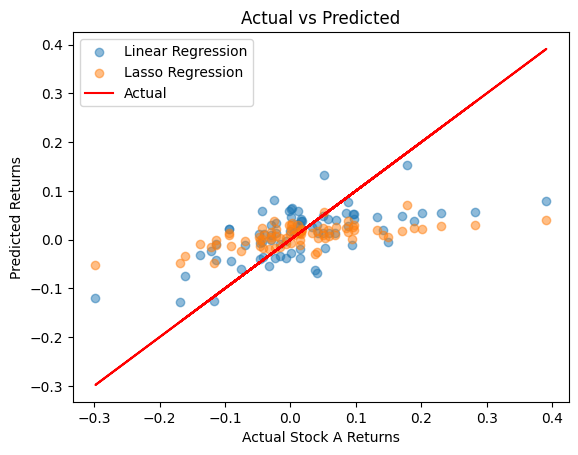

In [71]:
# Plot actual vs predicted
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.5)
plt.scatter(y_test, y_pred_lasso, label='Lasso Regression', alpha=0.5)
plt.plot(y_test, y_test, color='red', label='Actual')
plt.legend()
plt.xlabel('Actual Stock A Returns')
plt.ylabel('Predicted Returns')
plt.title('Actual vs Predicted')
plt.show()

Finding the best alpha value for lasso regression.

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import numpy as np

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso_model = Lasso(alpha=0.001, random_state=63)  # Reduced alpha value
lasso_model.fit(X_train_scaled, y_train)

# Check coefficients
print(f"Lasso Coefficients: {lasso_model.coef_}")

# Predict and evaluate
y_pred_lasso = lasso_model.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression - MSE: {mse_lasso}, R2: {r2_lasso}")

Lasso Coefficients: [ 0.06370635 -0.00656155 -0.0002306 ]
Lasso Regression - MSE: 0.006682584840286251, R2: 0.3647708294893318


In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Define alpha values to test
alpha_values = np.logspace(-4, 1, 50)

# Grid search for best alpha
lasso_cv = GridSearchCV(
    Lasso(random_state=42),
    param_grid={'alpha': alpha_values},
    scoring='neg_mean_squared_error',
    cv=5
)
lasso_cv.fit(X_train_scaled, y_train)

# Best alpha
best_alpha = lasso_cv.best_params_['alpha']
print(f"Best Alpha: {best_alpha}")

# Fit Lasso with best alpha
lasso_best = Lasso(alpha=best_alpha, random_state=63)
lasso_best.fit(X_train_scaled, y_train)

# Check coefficients and predict
print(f"Lasso Coefficients (Best Alpha): {lasso_best.coef_}")

Best Alpha: 0.0016768329368110084
Lasso Coefficients (Best Alpha): [ 0.06273723 -0.00576042 -0.        ]
